In [2]:
from preamble import *
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

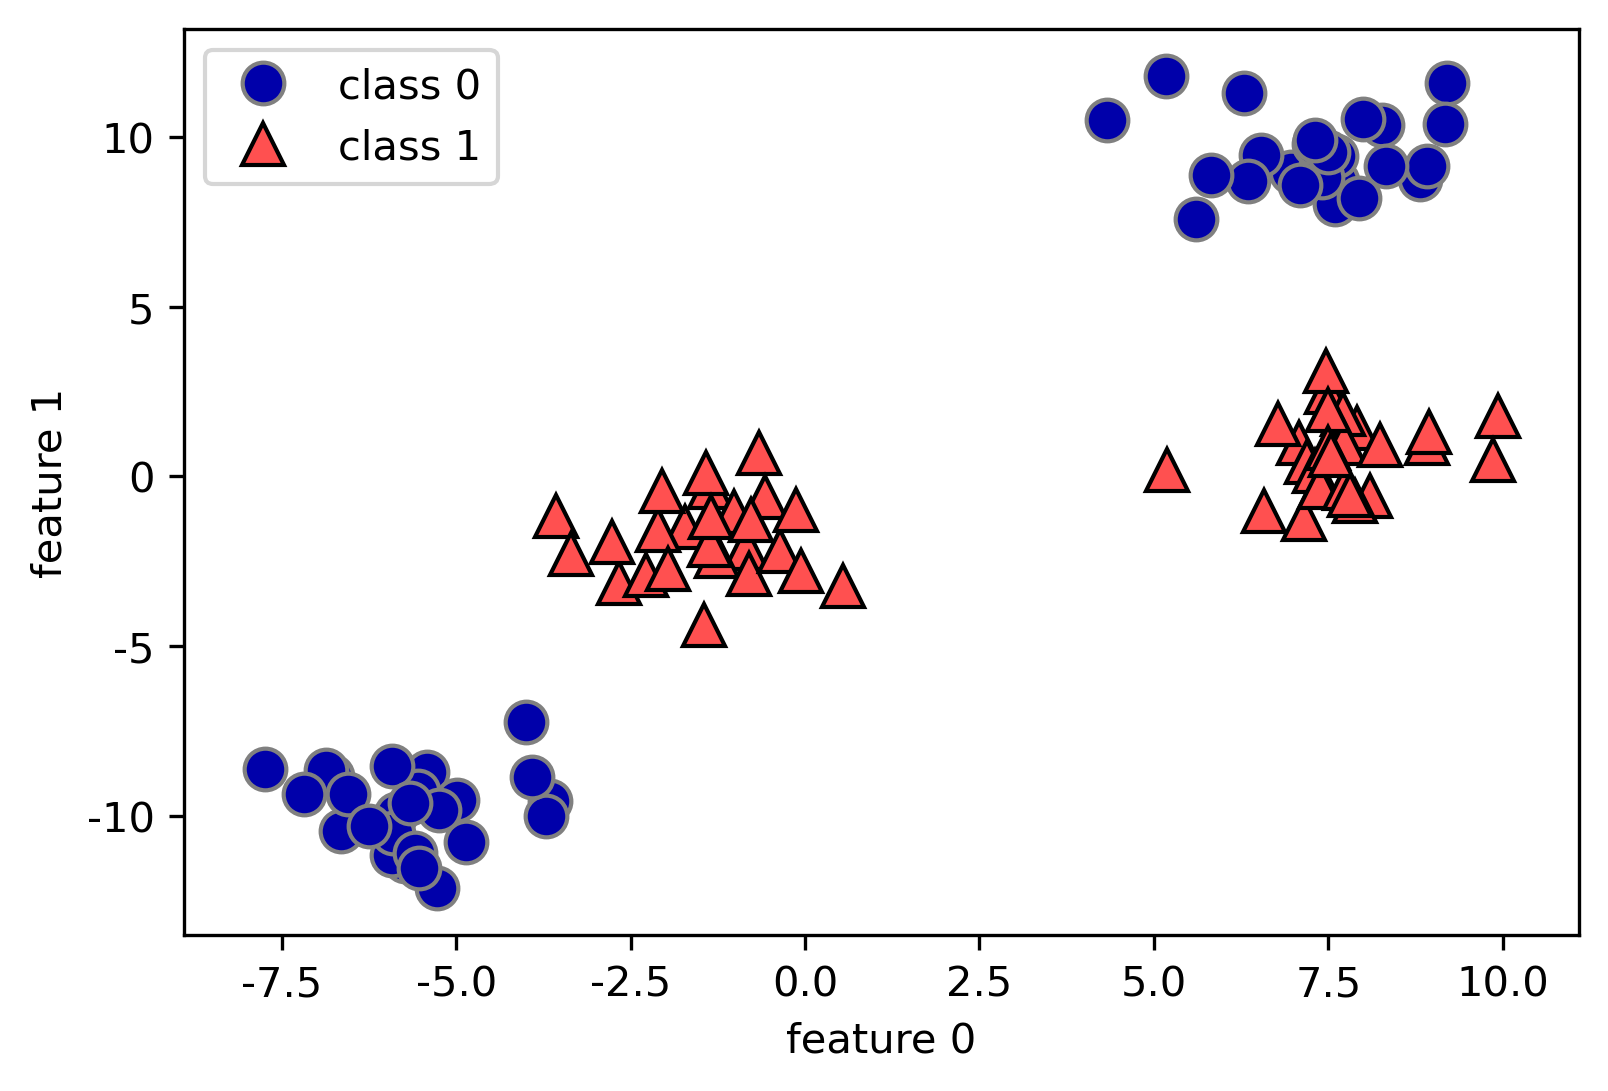

In [4]:
X, y =make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1"])

C:\Users\ckws5\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'feature 1')

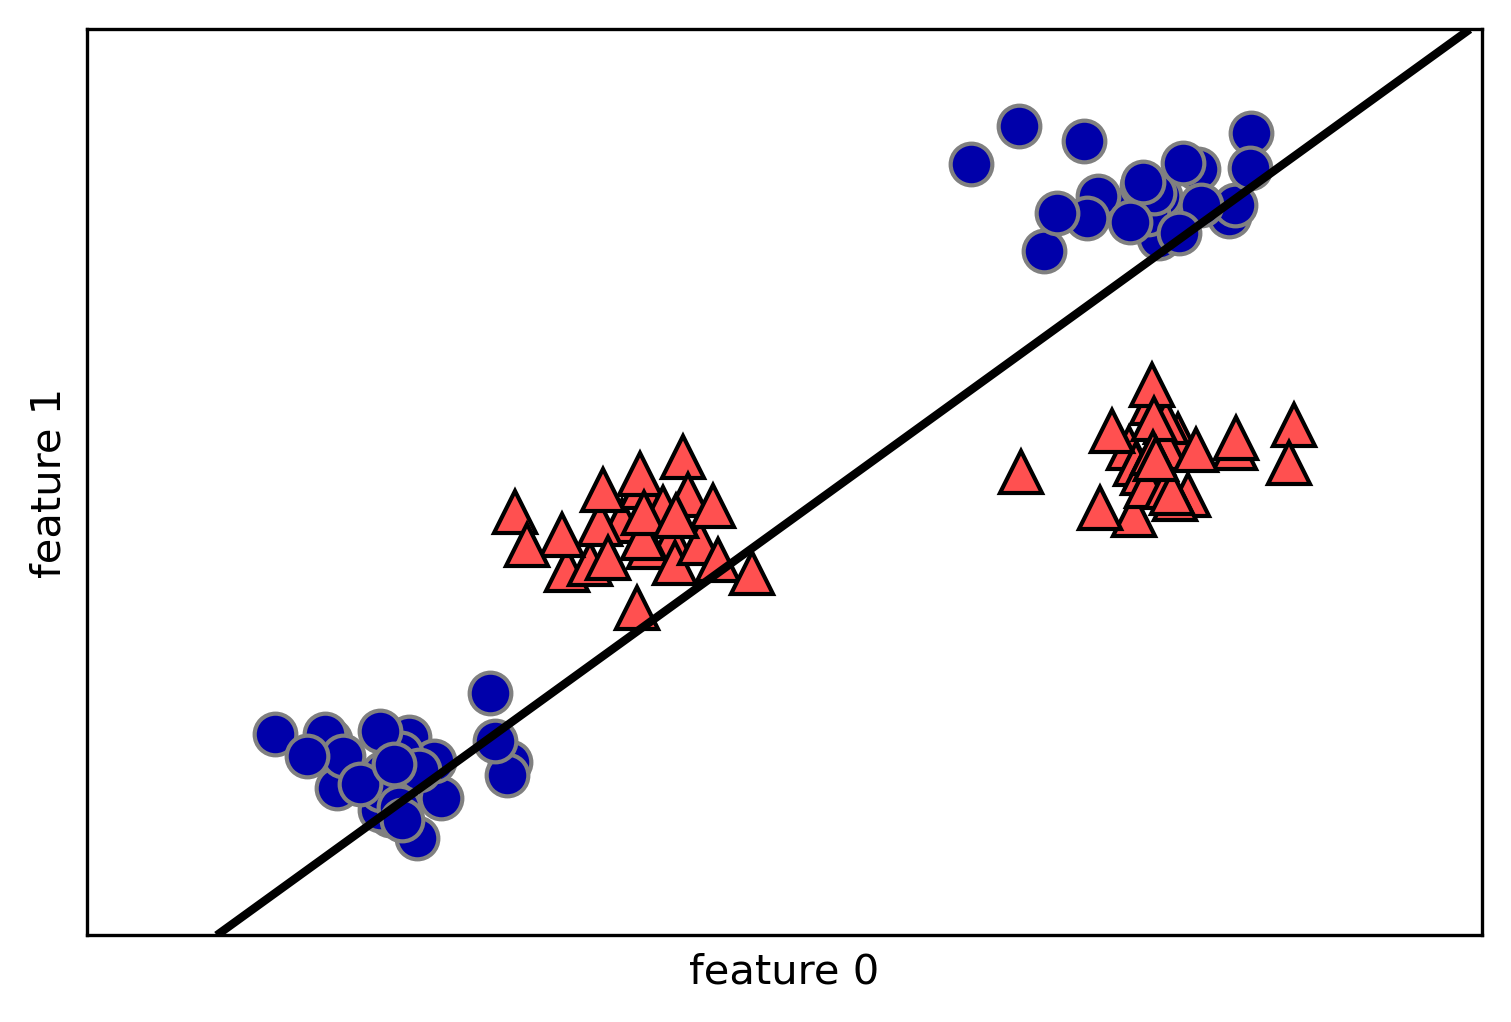

In [5]:
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

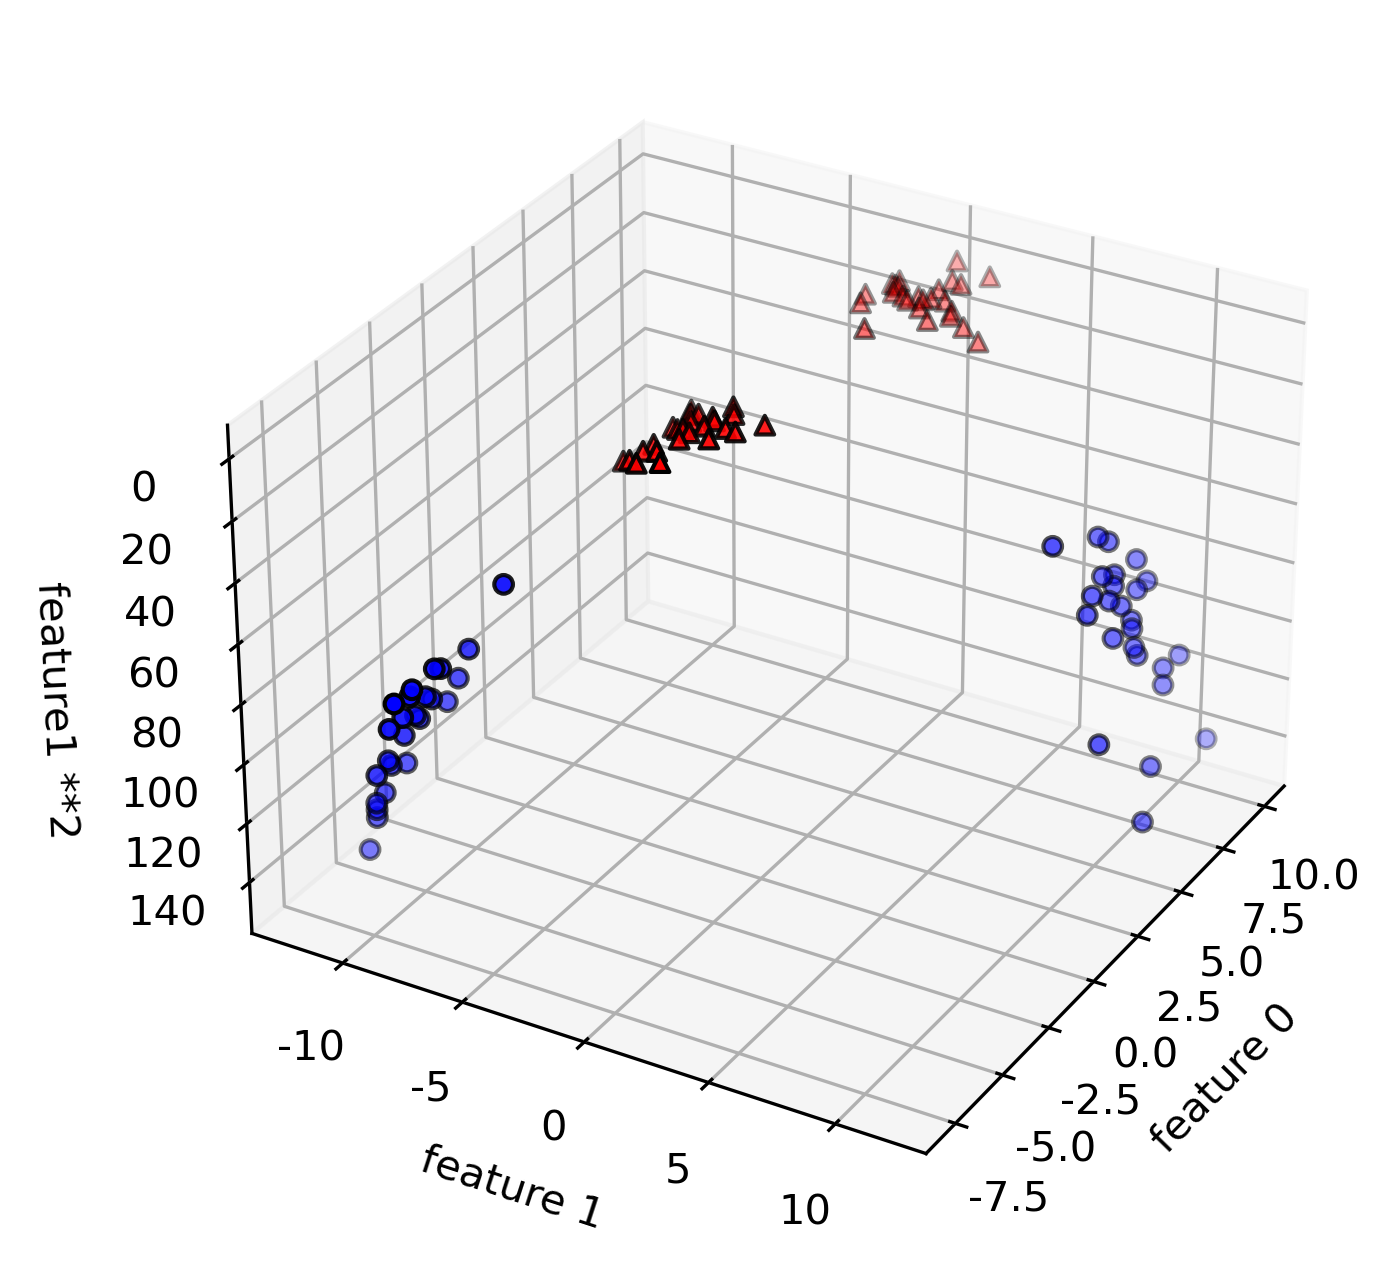

In [6]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

# 두번째 특성을 제곱하여 추가합니다.
X_new = np.hstack([X, X[:,1:]**2])
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev=-150, azim=-30)

# y == 0인 포인트를 먼저 그리고 그 다음 y==1인 포인트를 그립니다.
mask = y ==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 **2")
plt.show()

C:\Users\ckws5\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'feature1 **2')

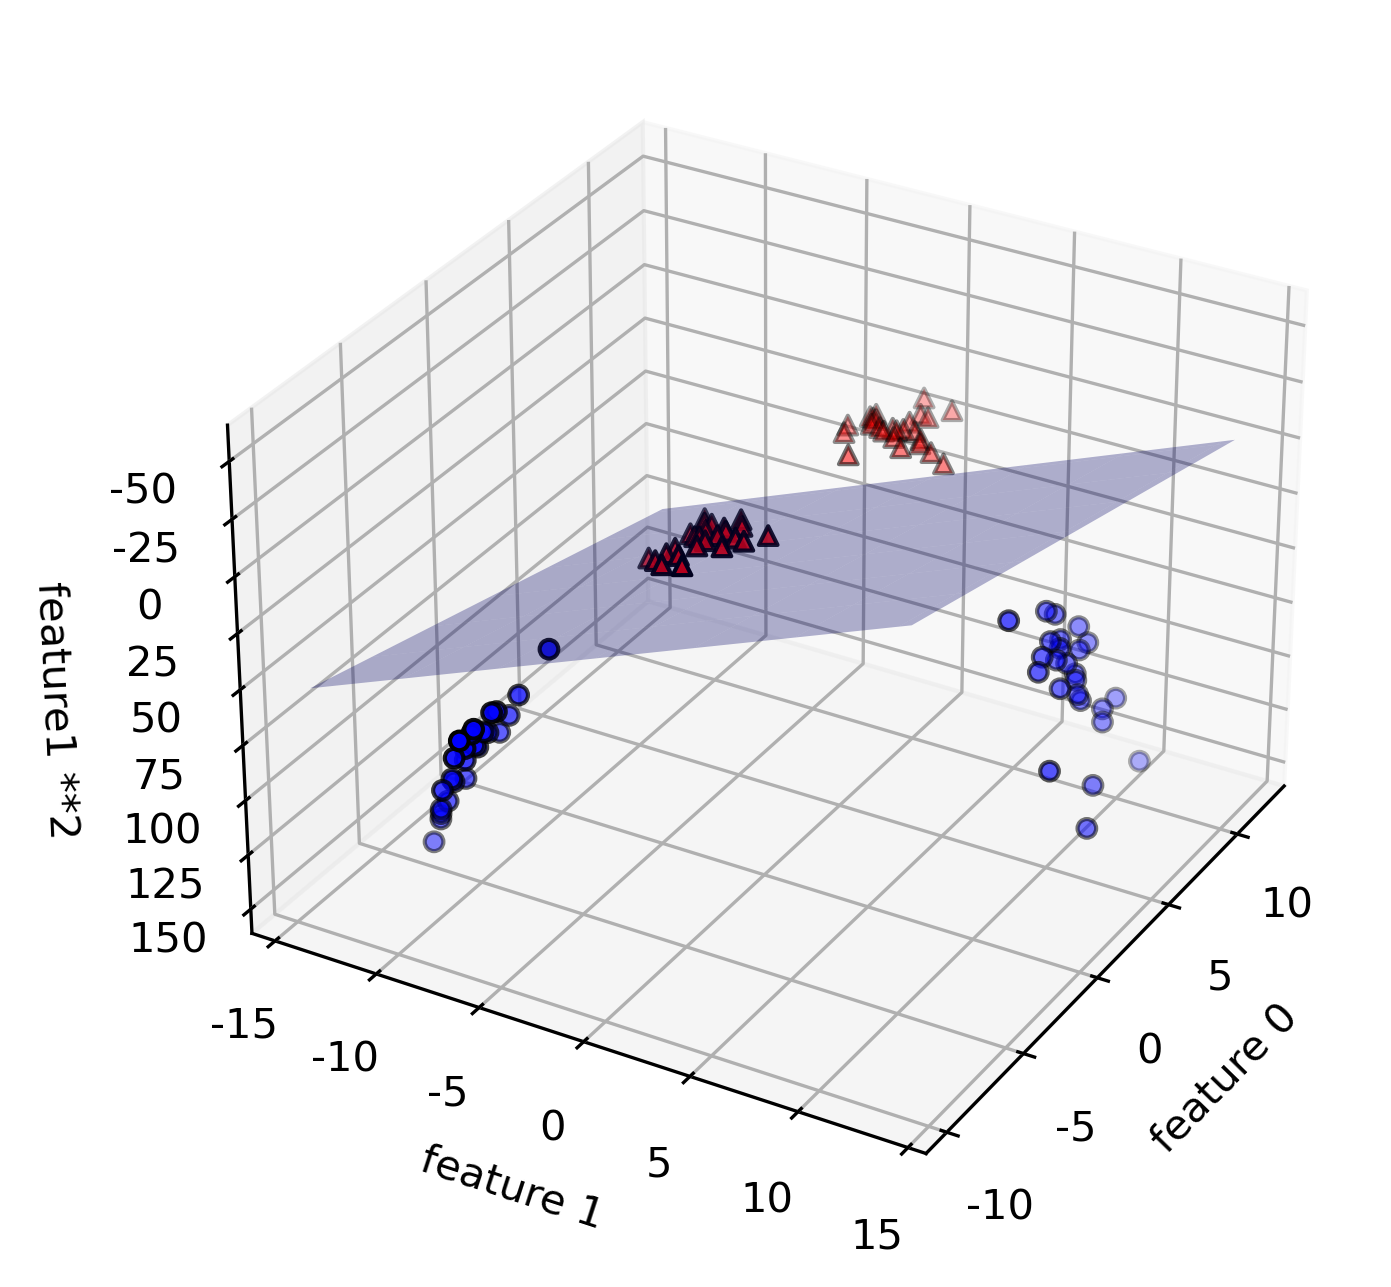

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef = linear_svm_3d.coef_.ravel()
intercept = linear_svm_3d.intercept_

#선형 결정 경계 그리기
figure = plt.figure()
ax =Axes3D(figure, elev=-150, azim=-30)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature1 **2")